<a href="https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS2 (continuation of PS1)
 1. produce several vis (3-10), and as always interpret your output, cycle back to research questions and hypotheses and discuss, eg
 vis support your initial ideas, anything unexpected, outliers, etc.

 The research questions and hypotheses are described in PS1 (click below)

#PS1

PS1

1.  Explain why you use datasets youre using: abstract with res q and hypotheses; extend and improve as we go over time the writeup must be longer and include at least: why these data, whats the research questions, hypotheses and specific variables you are interested in and why?

### **Mini Abstract - Research Context and Data Justification**  

#### **Research Topic:**  
**The Relationship Between County GDP and Business Formation in New Jersey**  

#### **Research Question:**  
**Do counties with higher GDP levels have a greater number of business applications in New Jersey?**  

#### **Hypothesis:**  
Counties in New Jersey with higher GDP levels will exhibit a higher number of new business applications, as economic growth fosters entrepreneurship through increased access to capital, consumer demand, and business opportunities.  

#### **Why These Data?**  
To explore this relationship, we use three datasets:  
1. **bfs_county_apps_annual.xlsx** – Contains annual business application counts by county, allowing us to measure entrepreneurship levels.  
2. **NJCountyData.xlsx** – Provides GDP per county, essential for understanding economic strength.  
3. **NJwage.xlsx** – Includes wage data by county, which helps control for income effects on entrepreneurship.  

#### **Key Variables of Interest:**  
- **Business Applications (Dependent Variable):** Measures entrepreneurship activity.  
- **GDP per County (Independent Variable):** Represents economic development and financial capacity.  
- **Median Income & Wages (Control Variables):** Adjust for economic disparities affecting entrepreneurship.  

This study will contribute to understanding how regional economic conditions impact business formation, providing insights for policymakers and economic development strategies.

Data
NJCountyData (2025)> https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.njeda.gov%2Fwp-content%2Fuploads%2F2021%2F05%2FNJCountyData-1.xlsx&wdOrigin=BROWSELINK

NJ data, population, gdp
https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv


Business Formation Statistics - Annual County Data
Business Applications by County (2025)

https://www.census.gov/econ/bfs/data/county.html

NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

NJ wage
https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Femploy%2Fqcew%2Fcvremp23.xlsx&wdOrigin=BROWSELINK

https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv




2.  Use at least 2 times each of the following in a way that makes sense and is useful:

 • rename var:
 • replace vals
 • drop or keep vars
 • collabse data (groupby agg)

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

Step 1. Download file from online and save in colab

Data

NJ data, population, gdp
https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv


NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

NJ wage
https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv

Sources:

Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY

Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk

In [ ]:
import pandas as pd
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv')

In [ ]:
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv')

In [ ]:
df3=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv')

In [ ]:
df1.head()
df2.head()
df3.head()

,County,Employment,Unemployment,Population,GDP,Median Income
0,Atlantic,100709,12.5,"266,105",12593490,62678
1,Bergen,426341,7.6,"930,390",70158193,107971
2,Burlington,210681,6.6,"445,702",25725252,88443
3,Camden,229229,8.2,"506,738",23558717,73168
4,Cape May,39046,12.6,"93,086",5070716,66565


,State,County,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,NJ,Atlantic County,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,NJ,Bergen County,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,NJ,Burlington County,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,NJ,Camden County,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,NJ,Cape May County,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


,County,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Atlantic,"$ 37,387","$ 38,568","$ 39,665","$ 40,362","$ 41,682","$ 42,850","$ 43,772","$ 49,306","$ 51,055","$ 52,852","$ 54,201"
1,Bergen,"$ 60,510","$ 62,191","$ 63,085","$ 63,323","$ 63,997","$ 65,378","$ 66,972","$ 73,426","$ 75,903","$ 77,278","$ 79,275"
2,Burlington,"$ 50,801","$ 51,597","$ 53,798","$ 53,456","$ 54,639","$ 56,829","$ 58,262","$ 64,983","$ 66,584","$ 67,974","$ 68,992"
3,Camden,"$ 47,212","$ 46,680","$ 49,078","$ 49,585","$ 51,162","$ 52,445","$ 54,335","$ 59,994","$ 62,506","$ 63,260","$ 64,846"
4,Cape May,"$ 30,578","$ 31,183","$ 32,361","$ 33,248","$ 33,359","$ 34,088","$ 35,378","$ 39,104","$ 41,103","$ 42,920","$ 44,209"


Rename

In [ ]:
df1.rename(columns={"GDP": "Gross Domestic Product"}, inplace=True)

In [ ]:
df1.head()

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.5,"266,105",12593490,62678
1,Bergen,426341,7.6,"930,390",70158193,107971
2,Burlington,210681,6.6,"445,702",25725252,88443
3,Camden,229229,8.2,"506,738",23558717,73168
4,Cape May,39046,12.6,"93,086",5070716,66565


In [ ]:
df3.rename(columns={
    "2013": "Wage 2013",
    "2014": "Wage 2014",
    "2015": "Wage 2015",
    "2016": "Wage 2016",
    "2017": "Wage 2017",
    "2018": "Wage 2018",
    "2019": "Wage 2019",
    "2020": "Wage 2020",
    "2021": "Wage 2021",
    "2022": "Wage 2022",
    "2023": "Wage 2023"
}, inplace=True)

In [ ]:
df3.head()

,County,Wage 2013,Wage 2014,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023
0,Atlantic,"$ 37,387","$ 38,568","$ 39,665","$ 40,362","$ 41,682","$ 42,850","$ 43,772","$ 49,306","$ 51,055","$ 52,852","$ 54,201"
1,Bergen,"$ 60,510","$ 62,191","$ 63,085","$ 63,323","$ 63,997","$ 65,378","$ 66,972","$ 73,426","$ 75,903","$ 77,278","$ 79,275"
2,Burlington,"$ 50,801","$ 51,597","$ 53,798","$ 53,456","$ 54,639","$ 56,829","$ 58,262","$ 64,983","$ 66,584","$ 67,974","$ 68,992"
3,Camden,"$ 47,212","$ 46,680","$ 49,078","$ 49,585","$ 51,162","$ 52,445","$ 54,335","$ 59,994","$ 62,506","$ 63,260","$ 64,846"
4,Cape May,"$ 30,578","$ 31,183","$ 32,361","$ 33,248","$ 33,359","$ 34,088","$ 35,378","$ 39,104","$ 41,103","$ 42,920","$ 44,209"


Replace

In [ ]:
# Replace county names by removing "County"
df2["County"] = df2["County"].replace({
    "Atlantic County": "Atlantic",
    "Bergen County": "Bergen",
    "Burlington County": "Burlington",
    "Camden County": "Camden",
    "Cape May County": "Cape May",
    "Cumberland County": "Cumberland",
    "Essex County": "Essex",
    "Gloucester County": "Gloucester",
    "Hudson County": "Hudson",
    "Hunterdon County": "Hunterdon",
    "Mercer County": "Mercer",
    "Middlesex County": "Middlesex",
    "Monmouth County": "Monmouth",
    "Morris County": "Morris",
    "Ocean County": "Ocean",
    "Passaic County": "Passaic",
    "Salem County": "Salem",
    "Somerset County": "Somerset",
    "Sussex County": "Sussex",
    "Union County": "Union",
    "Warren County": "Warren"
})

# Verify the changes
print(df2.head())


  State      County  County Code  fipstate  fipscty  BA2005  BA2006  BA2007  \
0    NJ    Atlantic        34001        34        1    2281    2314    2336   
1    NJ      Bergen        34003        34        3   11218   11633   11833   
2    NJ  Burlington        34005        34        5    3816    3904    4103   
3    NJ      Camden        34007        34        7    3953    4322    4398   
4    NJ    Cape May        34009        34        9    1080    1002     962   

   BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  BA2019  \
0    2227    2050  ...    2163    2161    2113    2195    2275    2501   
1   11537   11091  ...   11854   12345   12533   13497   14780   14225   
2    3927    3470  ...    3576    3601    3704    4084    4534    4732   
3    4336    3812  ...    3855    3918    4107    4321    4740    5131   
4     915     774  ...     803    1014     833     863     906     925   

   BA2020  BA2021  BA2022  BA2023  
0    3295    4082    3862    3885  
1   1550

In [ ]:
# Replace "NJ" with "New Jersey" in the "State" column
df2["State"] = df2["State"].replace("NJ", "New Jersey")

# Display the first few rows to verify changes
print(df2.head())

        State      County  County Code  fipstate  fipscty  BA2005  BA2006  \
0  New Jersey    Atlantic        34001        34        1    2281    2314   
1  New Jersey      Bergen        34003        34        3   11218   11633   
2  New Jersey  Burlington        34005        34        5    3816    3904   
3  New Jersey      Camden        34007        34        7    3953    4322   
4  New Jersey    Cape May        34009        34        9    1080    1002   

   BA2007  BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  \
0    2336    2227    2050  ...    2163    2161    2113    2195    2275   
1   11833   11537   11091  ...   11854   12345   12533   13497   14780   
2    4103    3927    3470  ...    3576    3601    3704    4084    4534   
3    4398    4336    3812  ...    3855    3918    4107    4321    4740   
4     962     915     774  ...     803    1014     833     863     906   

   BA2019  BA2020  BA2021  BA2022  BA2023  
0    2501    3295    4082    3862    3885  
1   

Drop or keep

In [ ]:
# Keep only rows where "State" is "New Jersey"
df2 = df2[df2["State"] == "New Jersey"]

# Reset the index after filtering
df2 = df2.reset_index(drop=True)

# Display the first few rows to verify
print(df2.head())

        State      County  County Code  fipstate  fipscty  BA2005  BA2006  \
0  New Jersey    Atlantic        34001        34        1    2281    2314   
1  New Jersey      Bergen        34003        34        3   11218   11633   
2  New Jersey  Burlington        34005        34        5    3816    3904   
3  New Jersey      Camden        34007        34        7    3953    4322   
4  New Jersey    Cape May        34009        34        9    1080    1002   

   BA2007  BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  \
0    2336    2227    2050  ...    2163    2161    2113    2195    2275   
1   11833   11537   11091  ...   11854   12345   12533   13497   14780   
2    4103    3927    3470  ...    3576    3601    3704    4084    4534   
3    4398    4336    3812  ...    3855    3918    4107    4321    4740   
4     962     915     774  ...     803    1014     833     863     906   

   BA2019  BA2020  BA2021  BA2022  BA2023  
0    2501    3295    4082    3862    3885  
1   

In [ ]:
df2.head()

,State,County,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [ ]:
# Drop the columns "County Code", "fipstate", and "fipscty"
df2 = df2.drop(columns=["County Code", "fipstate", "fipscty"], errors="ignore")

# Display the first few rows to verify changes
print(df2.head())

        State      County  BA2005  BA2006  BA2007  BA2008  BA2009  BA2010  \
0  New Jersey    Atlantic    2281    2314    2336    2227    2050    2159   
1  New Jersey      Bergen   11218   11633   11833   11537   11091   11437   
2  New Jersey  Burlington    3816    3904    4103    3927    3470    3515   
3  New Jersey      Camden    3953    4322    4398    4336    3812    3946   
4  New Jersey    Cape May    1080    1002     962     915     774     789   

   BA2011  BA2012  ...  BA2014  BA2015  BA2016  BA2017  BA2018  BA2019  \
0    2095    2117  ...    2163    2161    2113    2195    2275    2501   
1   11706   11650  ...   11854   12345   12533   13497   14780   14225   
2    3618    3510  ...    3576    3601    3704    4084    4534    4732   
3    3893    3895  ...    3855    3918    4107    4321    4740    5131   
4     843     881  ...     803    1014     833     863     906     925   

   BA2020  BA2021  BA2022  BA2023  
0    3295    4082    3862    3885  
1   15508   18500   

In [ ]:
df2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,803,1014,833,863,906,925,1052,1334,1284,1311


Collapse data (groupby agg)

In [ ]:
#Before using groupby().agg(), we need to clean the wage values by:

#Removing dollar signs ($) and commas (,)
#Converting them to numeric values

# Remove "$" and "," from wage columns and convert to numeric
df3.iloc[:, 1:] = df3.iloc[:, 1:].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
print(df3.dtypes)  # Wages should now be float numbers

County       object
Wage 2013    object
Wage 2014    object
Wage 2015    object
Wage 2016    object
Wage 2017    object
Wage 2018    object
Wage 2019    object
Wage 2020    object
Wage 2021    object
Wage 2022    object
Wage 2023    object
dtype: object


In [ ]:
# Collapse wages by county (calculating mean, min, max, and count across all years)
df3_collapsed = df3.set_index("County").agg(["mean", "min", "max", "count"])

# Flatten multi-index columns for clarity
df3_collapsed.columns = ['_'.join(map(str, col)) for col in df3_collapsed.columns]

# Reset index to keep "County" as a column
df3_collapsed.reset_index(inplace=True)

# Display the collapsed dataset
print(df3_collapsed)

   index  W_a_g_e_ _2_0_1_3  W_a_g_e_ _2_0_1_4  W_a_g_e_ _2_0_1_5  \
0   mean            53081.0       54229.619048        55816.47619   
1    min            30578.0       31183.000000        32361.00000   
2    max            82647.0       84480.000000        87243.00000   
3  count               21.0          21.000000           21.00000   

   W_a_g_e_ _2_0_1_6  W_a_g_e_ _2_0_1_7  W_a_g_e_ _2_0_1_8  W_a_g_e_ _2_0_1_9  \
0        56113.52381       57420.571429       58584.619048       60122.619048   
1        33248.00000       33359.000000       34088.000000       35378.000000   
2        86965.00000       86078.000000       89517.000000       91866.000000   
3           21.00000          21.000000          21.000000          21.000000   

   W_a_g_e_ _2_0_2_0  W_a_g_e_ _2_0_2_1  W_a_g_e_ _2_0_2_2  W_a_g_e_ _2_0_2_3  
0       65888.095238       67598.619048       69420.190476       71087.857143  
1       39104.000000       41103.000000       42920.000000       44209.000000  
2      1

In [ ]:
df3_collapsed.head()

,index,W_a_g_e_ _2_0_1_3,W_a_g_e_ _2_0_1_4,W_a_g_e_ _2_0_1_5,W_a_g_e_ _2_0_1_6,W_a_g_e_ _2_0_1_7,W_a_g_e_ _2_0_1_8,W_a_g_e_ _2_0_1_9,W_a_g_e_ _2_0_2_0,W_a_g_e_ _2_0_2_1,W_a_g_e_ _2_0_2_2,W_a_g_e_ _2_0_2_3
0,mean,53081.0,54229.619048,55816.47619,56113.52381,57420.571429,58584.619048,60122.619048,65888.095238,67598.619048,69420.190476,71087.857143
1,min,30578.0,31183.000000,32361.00000,33248.00000,33359.000000,34088.000000,35378.000000,39104.000000,41103.000000,42920.000000,44209.000000
2,max,82647.0,84480.000000,87243.00000,86965.00000,86078.000000,89517.000000,91866.000000,100212.000000,101309.000000,102393.000000,104451.000000
3,count,21.0,21.000000,21.00000,21.00000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000


In [ ]:
df2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [ ]:
import pandas as pd

# Rename "Último Valor" to "BA2023" to clearly indicate business applications in 2023
df2 = df2.rename(columns={"Último Valor": "BA2023"})

# Ensure "BA2023" is numeric for aggregation
df2["BA2023"] = pd.to_numeric(df2["BA2023"], errors="coerce")

# Compute the total sum and average of business applications in New Jersey for 2023
total_applications = df2["BA2023"].sum()
average_applications = df2["BA2023"].mean()

# Create a summary DataFrame
df2_summary = pd.DataFrame({
    "Metric": ["Total Applications", "Average Applications per County"],
    "BA2023": [total_applications, average_applications]
})

# Display the summary dataset
print(df2_summary)


                            Metric         BA2023
0               Total Applications  160117.000000
1  Average Applications per County    7624.619048


In [ ]:
import pandas as pd

# Rename "Último Valor" to "BA2023"
df2 = df2.rename(columns={"Último Valor": "BA2023"})

# Ensure "BA2023" is numeric for aggregation
df2["BA2023"] = pd.to_numeric(df2["BA2023"], errors="coerce")

# Collapse data by applying sum and mean to BA2023
df2_collapsed = df2.agg({
    "BA2023": ["sum", "mean"]
})

# Rename index for clarity
df2_collapsed.index = ["Total Applications", "Average Applications per County"]

# Convert to DataFrame
df2_collapsed = df2_collapsed.reset_index()
df2_collapsed.columns = ["Metric", "BA2023"]

# Display the collapsed dataset
print(df2_collapsed)


                            Metric         BA2023
0               Total Applications  160117.000000
1  Average Applications per County    7624.619048


3. Merge at least 3 datasets (at least 2 merges); eg merge on geography (eg state), time (eg year), or some var (eg occupation)

In [ ]:
df2_collapsed.head()

,Metric,BA2023
0,Total Applications,160117.000000
1,Average Applications per County,7624.619048


Merge

In [ ]:
mergedOuter = pd.merge(df1, df2, how='outer', on=['County'],indicator=True) #outer=keep all
mergedOuter

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,Atlantic,100709,12.5,"266,105",12593490,62678,New Jersey,2281,2314,2336,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,Bergen,426341,7.6,"930,390",70158193,107971,New Jersey,11218,11633,11833,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,Burlington,210681,6.6,"445,702",25725252,88443,New Jersey,3816,3904,4103,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,Camden,229229,8.2,"506,738",23558717,73168,New Jersey,3953,4322,4398,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,Cape May,39046,12.6,"93,086",5070716,66565,New Jersey,1080,1002,962,...,1014,833,863,906,925,1052,1334,1284,1311,both
5,Cumberland,58005,9.7,"151,906",6007622,54179,New Jersey,922,1043,982,...,964,976,1035,983,1169,1496,1983,1877,1982,both
6,Essex,326411,9.9,"795,404",52070494,64522,New Jersey,8744,9321,9401,...,10179,10820,11957,12988,14072,18866,21361,18122,18476,both
7,Gloucester,136373,7.5,"291,165",14017096,87996,New Jersey,2142,2159,2263,...,1855,2032,2099,2244,2268,2981,3826,3666,3977,both
8,Hudson,317844,8.7,"670,046",43847173,77738,New Jersey,6334,6458,6722,...,7720,8050,8585,9008,9512,11378,13484,13100,14321,both
9,Hunterdon,57934,5.9,"124,823",6820939,117275,New Jersey,1326,1364,1412,...,1133,1133,1319,1338,1256,1334,1612,1601,1674,both


Explanation

The merge between df1 (socioeconomic indicators) and df2 (business applications) was successful, with all records classified as "both", meaning every county matched perfectly. This ensures a complete integration of socioeconomic data and business applications, allowing for a direct analysis of how economic factors influence business formation in New Jersey without data loss.

Why Did the Merge Work Perfectly?
You merged df1 and df2 on "County".
Every county in df1 (socioeconomic data) had a matching county in df2 (business applications).
Since all counties matched, every row in the merged dataset was classified as "both" under _merge.

What Does "both" Mean?
In Pandas' merge operation, the _merge column tells you where the data came from:

"left_only" → Exists only in df1 (socioeconomic indicators).
"right_only" → Exists only in df2 (business applications).
"both" → Exists in both datasets (perfect match).

In [ ]:
# Merge df2 (business applications) with df3 (wages) on "County"
#merged_df = pd.merge(df2, df3, how="outer", on="County", indicator=True)

mergedOuter2 = pd.merge(df2, df3, how='outer', on=['County'],indicator=True) #outer=keep all
mergedOuter2

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023,_merge
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,39665.0,40362.0,41682.0,42850.0,43772.0,49306.0,51055.0,52852.0,54201.0,both
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,63085.0,63323.0,63997.0,65378.0,66972.0,73426.0,75903.0,77278.0,79275.0,both
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,53798.0,53456.0,54639.0,56829.0,58262.0,64983.0,66584.0,67974.0,68992.0,both
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,49078.0,49585.0,51162.0,52445.0,54335.0,59994.0,62506.0,63260.0,64846.0,both
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,32361.0,33248.0,33359.0,34088.0,35378.0,39104.0,41103.0,42920.0,44209.0,both
5,New Jersey,Cumberland,922,1043,982,933,837,822,812,865,...,40951.0,41038.0,41775.0,42780.0,43714.0,47563.0,49617.0,51997.0,53218.0,both
6,New Jersey,Essex,8744,9321,9401,8942,8676,9327,9766,9815,...,63197.0,64966.0,66718.0,68966.0,71042.0,77955.0,79140.0,80567.0,82810.0,both
7,New Jersey,Gloucester,2142,2159,2263,2096,1860,1895,1854,1831,...,42778.0,43404.0,43661.0,44692.0,45364.0,49010.0,51156.0,52568.0,54471.0,both
8,New Jersey,Hudson,6334,6458,6722,6914,6360,7051,7711,7486,...,72715.0,72935.0,76401.0,79307.0,79639.0,87551.0,90443.0,93112.0,94413.0,both
9,New Jersey,Hunterdon,1326,1364,1412,1351,1267,1259,1261,1281,...,62093.0,62442.0,68166.0,66403.0,66196.0,70503.0,72033.0,72274.0,72843.0,both


Explanation

The merge between **df2 (business applications)** and **df3 (wages)** was successful, with all records classified as **"both"**, meaning every county matched perfectly in both datasets. This ensures a **complete integration** of business application data and wage information, allowing for a **direct analysis** of how wages relate to business formation in New Jersey without any data loss.

References

https://github.com/theaok/vis/blob/main/all.ipynb

ChatGpt

Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY
Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk

# VIS PS2

In [ ]:
df2_collapsed[:10].style.background_gradient(cmap='Greens').format(precision=2)

,Metric,BA2023
0,Total Applications,160117.00
1,Average Applications per County,7624.62


Explanation> the total application to open new business in New Jersey is in average 7624.62, but the total are 160117.00 and that could be because some county have higher number of application than others.

In [ ]:
df2_collapsed[:5].style.text_gradient(cmap='Blues').format(precision=2) #maybe better more delicate

,Metric,BA2023
0,Total Applications,160117.00
1,Average Applications per County,7624.62


Explanation> diferent format, same results. Explanation> the total application to open new business in New Jersey is in average 7624.62, but the total are 160117.00 and that could be because some county have higher number of application than others.

In [ ]:
df1[:10].style.background_gradient(cmap='Greens').format(precision=2)

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Explanations> a table to explore the data in a better visual way. with mostly all the variables of the research in columns. Dark green for higher level of data values.

In [ ]:
df1[:5].style.text_gradient(cmap='Blues').format(precision=2) #maybe better more delicate

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565


Explanations> a table to explore the data in a better visual way. with mostly all the variables of the research in columns.

In [ ]:
df1[:10].style.bar(subset=pd.IndexSlice[:, ['Gross Domestic Product', 'Unemployment']], color='#d65f5f').format(precision=2) #bar chart
# Use pd.IndexSlice to correctly specify columns within the subset argument
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Explanations> a chart to explore the data in a better visual way. with mostly all the variables of the research in columns. We can see easyly when each county have higher values of each variables. Highlighted in red are the variables GDP and Unemployment.

In [191]:
df1[:10].style.bar(subset=['Gross Domestic Product', 'Employment'], color='#d65f5f').format(precision=2) #bar chart
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Same bar graph. Highlighted in red are the variables GDP and Employment.

##To export as html
###convert into html, Usefull to hare a specific graphic.

In [ ]:
#and can export it to_html() and download onto hard drive
html = df2_collapsed.style.background_gradient(cmap="hot").to_html() #Reds Greens
f = open('df2_collapsed.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('df2_collapsed.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#df2_collapsed.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

981

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#and can export it to_html() and download onto hard drive
html = df1.style.background_gradient(cmap="hot").to_html() #Reds Greens
f = open('df1.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('df1.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#df1.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

16544

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In the next steps, correlation table between all variables included in df1, GDP, Employment, Population, Median Income and Unemployment.

First I need to review what type of data are in my dataframe of my interest, df1. I see I have int64 and float64. The others are object because County are the Unit of analysis and category, also there is a information about Population, here appear as a object, but for now we will no use this variable. I just want to review my Int64 data types.

In [ ]:
df1.dtypes

,0
County,object
Employment,int64
Unemployment,float64
Population,object
Gross Domestic Product,int64
Median Income,int64


In [ ]:
df1.select_dtypes(include=['int64'])

,Employment,Gross Domestic Product,Median Income
0,100709,12593490,62678
1,426341,70158193,107971
2,210681,25725252,88443
3,229229,23558717,73168
4,39046,5070716,66565
5,58005,6007622,54179
6,326411,52070494,64522
7,136373,14017096,87996
8,317844,43847173,77738
9,57934,6820939,117275


Explanations> type of data int64, I can build any type of graphics like bars or scatterplot because are continuos variables. Later we can sort and see the correlations.

In [ ]:
#Correlation Matrix
#can color any table output, say corr matrix
df1.select_dtypes(include=['int64','float64']).corr().style.background_gradient(cmap='RdYlGn').format(precision=2)

,Employment,Unemployment,Gross Domestic Product,Median Income
Employment,1.00,-0.22,0.91,0.21
Unemployment,-0.22,1.00,-0.27,-0.73
Gross Domestic Product,0.91,-0.27,1.00,0.35
Median Income,0.21,-0.73,0.35,1.00


Explanations> correlation matirx in the table.


(array([4., 4., 4., 2., 2., 2., 1., 0., 0., 2.]),
 array([ 5.9 ,  6.57,  7.24,  7.91,  8.58,  9.25,  9.92, 10.59, 11.26,
        11.93, 12.6 ]),
 <BarContainer object of 10 artists>)

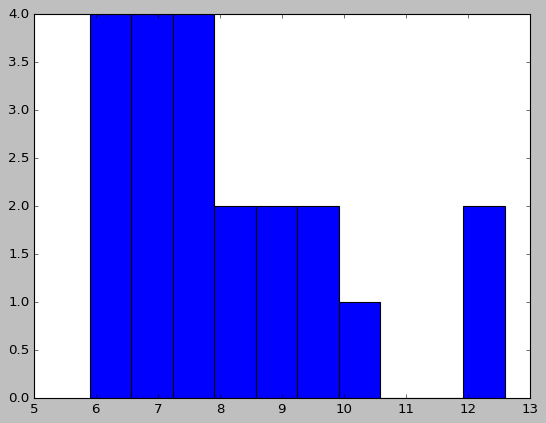

In [ ]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1.Unemployment)

(array([6., 1., 1., 1., 3., 4., 1., 2., 0., 2.]),
 array([ 26626. ,  66597.5, 106569. , 146540.5, 186512. , 226483.5,
        266455. , 306426.5, 346398. , 386369.5, 426341. ]),
 <BarContainer object of 10 artists>)

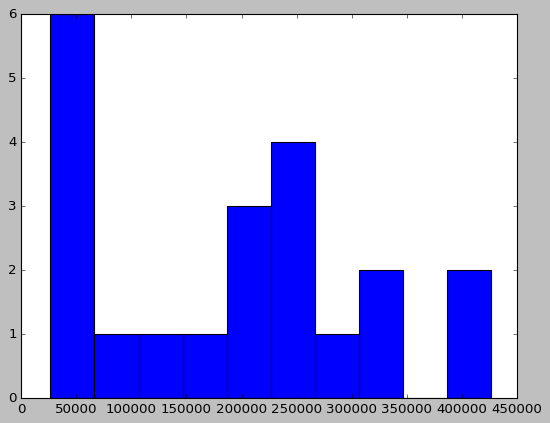

In [ ]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1.Employment)


Next> to build histograms of variables from dataframe 1.

(array([6., 2., 3., 1., 3., 1., 2., 1., 1., 1.]),
 array([ 3911548. , 10536212.5, 17160877. , 23785541.5, 30410206. ,
        37034870.5, 43659535. , 50284199.5, 56908864. , 63533528.5,
        70158193. ]),
 <BarContainer object of 10 artists>)

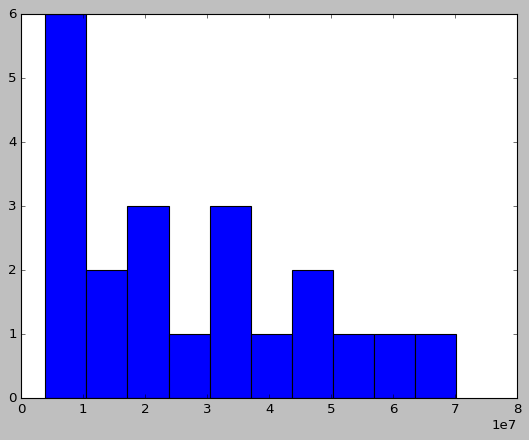

In [ ]:
#remember we did: import matplotlib.pyplot as plt
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1['Gross Domestic Product'])

Text(0.5, 0, 'Employment')

Text(0, 0.5, 'Gross Domestic Product')

(array([6., 1., 1., 1., 3., 4., 1., 2., 0., 2.]),
 array([ 26626. ,  66597.5, 106569. , 146540.5, 186512. , 226483.5,
        266455. , 306426.5, 346398. , 386369.5, 426341. ]),
 <BarContainer object of 10 artists>)

(0.0, 500000.0)

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

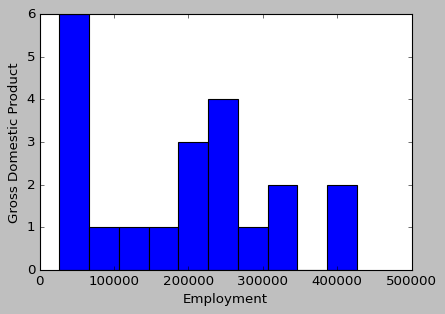

In [ ]:

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("Employment")  #remember always all axes must be labelled
ax.set_ylabel("Gross Domestic Product")
#put some plot in it, eg:
ax.hist(df1.Employment); #,alpha=.5,bins=20,color='blue'

#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
ax.set_xlim([0,500000])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

Text(0.5, 0, 'Unemployment')

Text(0, 0.5, 'Gross Domestic Product')

(array([4., 4., 4., 2., 2., 2., 1., 0., 0., 2.]),
 array([ 5.9 ,  6.57,  7.24,  7.91,  8.58,  9.25,  9.92, 10.59, 11.26,
        11.93, 12.6 ]),
 <BarContainer object of 10 artists>)

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

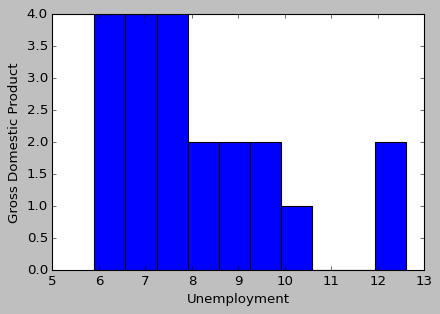

In [ ]:

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("Unemployment")  #remember always all axes must be labelled
ax.set_ylabel("Gross Domestic Product")
#put some plot in it, eg:
ax.hist(df1.Unemployment); #,alpha=.5,bins=20,color='blue'

#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
#ax.set_xlim([0,50])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

In [ ]:
df1.columns

Index(['County', 'Employment', 'Unemployment', 'Population',
       'Gross Domestic Product', 'Median Income'],
      dtype='object')

<Figure size 720x480 with 0 Axes>

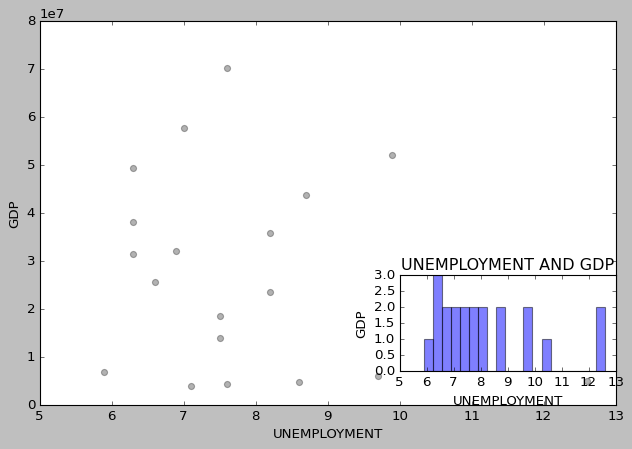

In [ ]:
#inset figure love it! looks like nature or science
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
#[a,b,c,d] (a,b): point in southwest corner of the rectangle; c=width; d= height
#ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
#inset figure love it! looks like nature or science
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
#[a,b,c,d] (a,b): point in southwest corner of the rectangle; c=width; d= height
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0.17, 0.3, 0.2]) # inset axes
# main figure
ax1.scatter(df1.Unemployment, df1['Gross Domestic Product'], c='black', s=30, alpha=0.3)
ax1.set_xlabel('UNEMPLOYMENT')
ax1.set_ylabel('GDP')
# inset
ax2.hist(df1.Unemployment,alpha=.5,bins=20,color='blue')
ax2.set_xlabel('UNEMPLOYMENT')
ax2.set_ylabel('GDP')
ax2.set_title('UNEMPLOYMENT AND GDP');


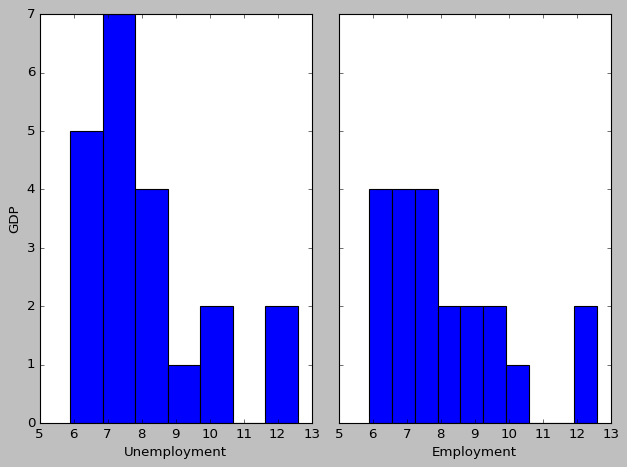

In [ ]:
#subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(df1.Unemployment, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#btw can do categorical var hist too: df1.Unemployment.value_counts() #same as bar chart
axs[1].hist(df1.Unemployment)
axs[0].set_ylabel('GDP')
axs[0].set_xlabel('Unemployment');
axs[1].set_xlabel('Employment')
axs[1].set_xlabel('Employment');

##alt
#fig = plt.figure()
#plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs
#ax1 = plt.subplot(211, title='UNEMPLOYMENT AND GDP') #2x1grid 1st graph
#plt.scatter(df1[df1.County=='Camden'].weight, df1[df1.County=='Camden'].length)
#ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph
#plt.scatter(df1[df1.County=='Camden'].weight, df1[df1.County=='Camden'].length)
#xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis
#plt.setp(xticklabels, visible=False)

Scatter Plot

Scatter plot helps visualize if there is a relationship between our variables from the H0> business applications and GDP, and the control variable Wage.
First, review the merged tables created before (PS1)

In [ ]:
mergedOuter.head()

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,Atlantic,100709,12.5,"266,105",12593490,62678,New Jersey,2281,2314,2336,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,Bergen,426341,7.6,"930,390",70158193,107971,New Jersey,11218,11633,11833,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,Burlington,210681,6.6,"445,702",25725252,88443,New Jersey,3816,3904,4103,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,Camden,229229,8.2,"506,738",23558717,73168,New Jersey,3953,4322,4398,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,Cape May,39046,12.6,"93,086",5070716,66565,New Jersey,1080,1002,962,...,1014,833,863,906,925,1052,1334,1284,1311,both


seaborn.scatterplot() to visualize the relationship.
X-axis: Gross Domestic Product (GDP).And
Y-axis: Business Applications in 2023 (BA2023).

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023)')

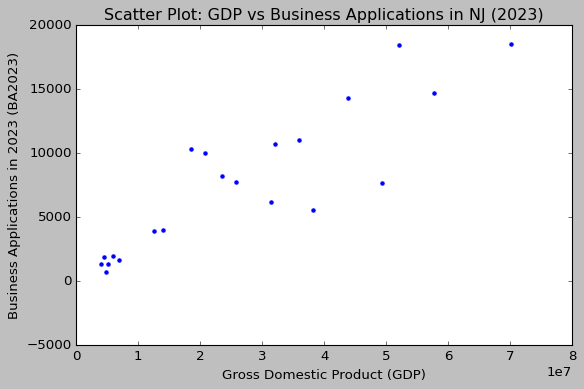

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Gross Domestic Product vs. Business Applications (BA2023)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023)")

# Show the plot
plt.show()


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line')

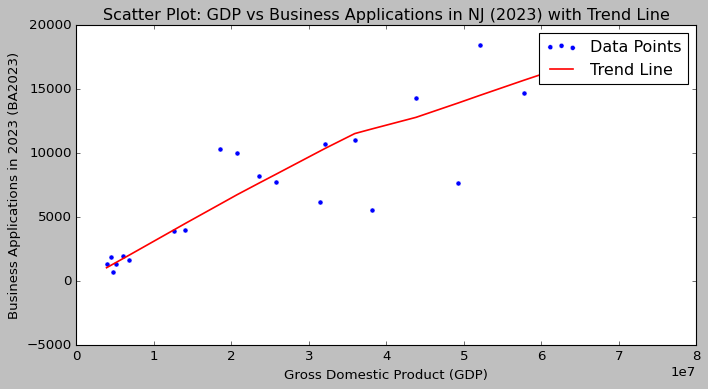

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Scatter plot: GDP vs Business Applications (BA2023)
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", label="Data Points")

# Add a trend line using regplot
sns.regplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", scatter=False, lowess=True, color='red', label="Trend Line")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line")

# Show the plot
plt.legend()
plt.show()


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(12593490, 3885, 'Atlantic')

Text(23558717, 8225, 'Camden')

Text(5070716, 1311, 'Cape May')

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line & Labels')

Text(43558717, 8500, 'Business Applications in Camden: 8,225\nGDP: 23,558,717')

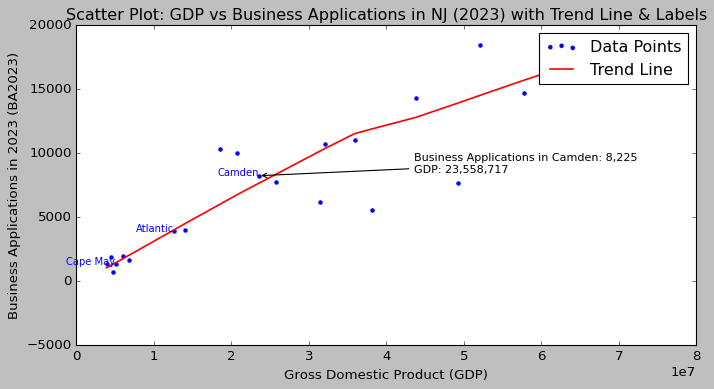

In [ ]:
# To add specific county labels
# Set figure size
plt.figure(figsize=(10, 5))

# Scatter plot: GDP vs Business Applications (BA2023)
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", label="Data Points")

# Add a trend line using regplot
sns.regplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", scatter=False, lowess=True, color='red', label="Trend Line")

# Add labels for specific counties
counties_to_label = ["Atlantic", "Camden", "Cape May"]
for i, row in mergedOuter.iterrows():
    if row["County"] in counties_to_label:
        plt.text(row["Gross Domestic Product"], row["BA2023"], row["County"], fontsize=9, ha='right', color='blue')

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line & Labels")
# Before show the plot, I want to add some notes about Camden
plt.annotate("Business Applications in Camden: 8,225\nGDP: 23,558,717",
             xy=(23558717, 8225), xytext=(23558717 + 20000000, 8500),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")

# Show the plot
plt.legend()
plt.show()


Explanation of Additions codes
* counties_to_label = ["Atlantic", "Camden", "Cape May"] → Defines which counties to label.
* Loop through mergedOuter.iterrows() → Checks if the row's county matches our list.
* plt.text(x, y, label, fontsize=9, ha='right', color='blue') → Places a text label at the correct GDP (x) and BA2023 (y) values.
* Uses color='blue' to make the labels stand out.

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Gross Domestic Product by County')

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Business Applications in 2023')

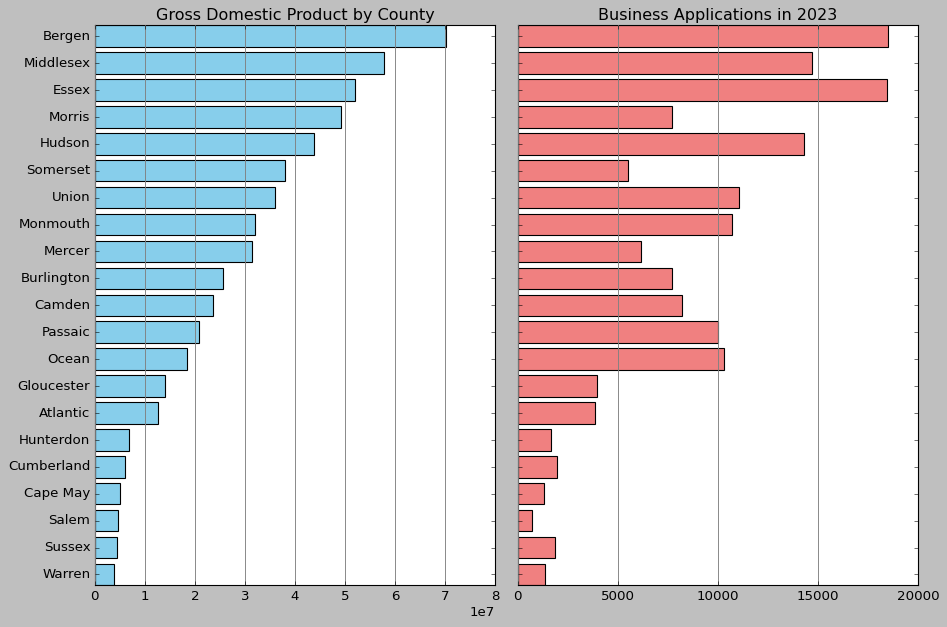

In [ ]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="skyblue")
axs[0].set_title('Gross Domestic Product by County')

# Second plot: Business Applications by County
axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Gross Domestic Product by County')

Text(4411548, 0.0, '3,911,548')

Text(4938507, 1.0, '4,438,507')

Text(5229720, 2.0, '4,729,720')

Text(5570716, 3.0, '5,070,716')

Text(6507622, 4.0, '6,007,622')

Text(7320939, 5.0, '6,820,939')

Text(13093490, 6.0, '12,593,490')

Text(14517096, 7.0, '14,017,096')

Text(19011055, 8.0, '18,511,055')

Text(21244966, 9.0, '20,744,966')

Text(24058717, 10.0, '23,558,717')

Text(26225252, 11.0, '25,725,252')

Text(31967636, 12.0, '31,467,636')

Text(32623913, 13.0, '32,123,913')

Text(36435725, 14.0, '35,935,725')

Text(38623619, 15.0, '38,123,619')

Text(44347173, 16.0, '43,847,173')

Text(49785606, 17.0, '49,285,606')

Text(52570494, 18.0, '52,070,494')

Text(58245463, 19.0, '57,745,463')

Text(70658193, 20.0, '70,158,193')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(1859, 0.0, '1,359')

Text(2342, 1.0, '1,842')

Text(1235, 2.0, '735')

Text(1811, 3.0, '1,311')

Text(2482, 4.0, '1,982')

Text(2174, 5.0, '1,674')

Text(4385, 6.0, '3,885')

Text(4477, 7.0, '3,977')

Text(10817, 8.0, '10,317')

Text(10525, 9.0, '10,025')

Text(8725, 10.0, '8,225')

Text(8203, 11.0, '7,703')

Text(6640, 12.0, '6,140')

Text(11195, 13.0, '10,695')

Text(11545, 14.0, '11,045')

Text(6018, 15.0, '5,518')

Text(14821, 16.0, '14,321')

Text(8194, 17.0, '7,694')

Text(18976, 18.0, '18,476')

Text(15185, 19.0, '14,685')

Text(19008, 20.0, '18,508')

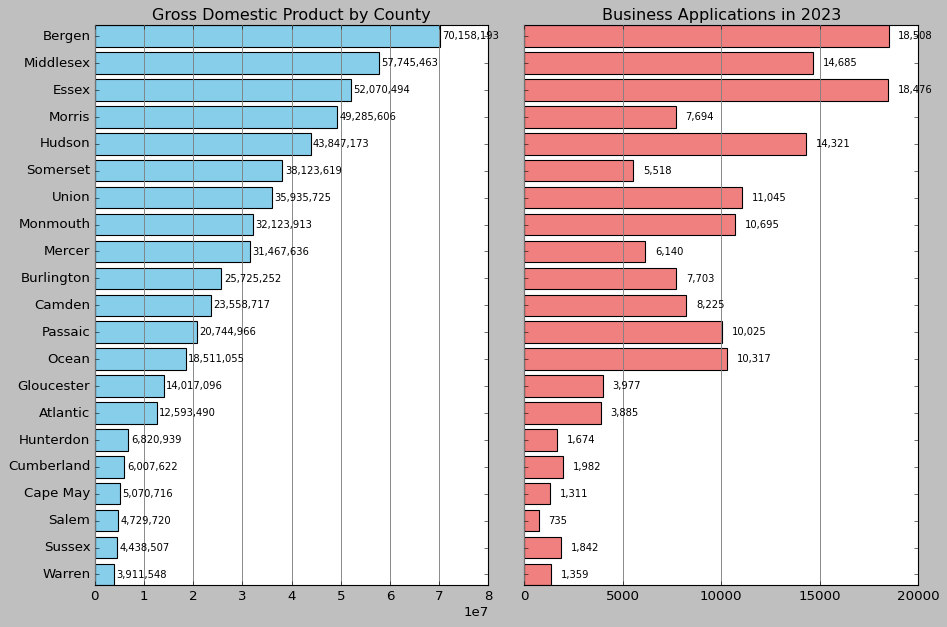

In [ ]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
bars1 = axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="skyblue")
axs[0].set_title('Gross Domestic Product by County')

# Add data labels for GDP
for bar in bars1:
    axs[0].text(bar.get_width() + 500000, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Unemployment by County in %')

Text(6.9, 0.0, '5')

Text(7.3, 1.0, '6')

Text(7.3, 2.0, '6')

Text(7.3, 3.0, '6')

Text(7.6, 4.0, '6')

Text(7.9, 5.0, '6')

Text(8.0, 6.0, '7')

Text(8.1, 7.0, '7')

Text(8.5, 8.0, '7')

Text(8.5, 9.0, '7')

Text(8.6, 10.0, '7')

Text(8.6, 11.0, '7')

Text(9.2, 12.0, '8')

Text(9.2, 13.0, '8')

Text(9.6, 14.0, '8')

Text(9.7, 15.0, '8')

Text(10.7, 16.0, '9')

Text(10.9, 17.0, '9')

Text(11.4, 18.0, '10')

Text(13.5, 19.0, '12')

Text(13.6, 20.0, '12')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(2174, 0.0, '1,674')

Text(6018, 1.0, '5,518')

Text(6640, 2.0, '6,140')

Text(8194, 3.0, '7,694')

Text(8203, 4.0, '7,703')

Text(11195, 5.0, '10,695')

Text(15185, 6.0, '14,685')

Text(1859, 7.0, '1,359')

Text(4477, 8.0, '3,977')

Text(10817, 9.0, '10,317')

Text(2342, 10.0, '1,842')

Text(19008, 11.0, '18,508')

Text(8725, 12.0, '8,225')

Text(11545, 13.0, '11,045')

Text(1235, 14.0, '735')

Text(14821, 15.0, '14,321')

Text(2482, 16.0, '1,982')

Text(18976, 17.0, '18,476')

Text(10525, 18.0, '10,025')

Text(4385, 19.0, '3,885')

Text(1811, 20.0, '1,311')

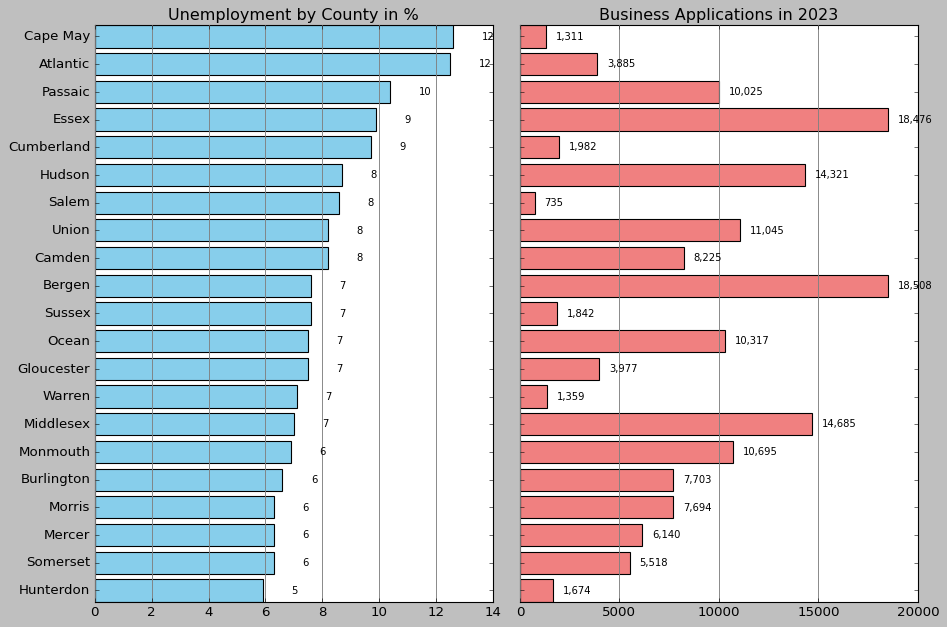

In [ ]:
# Sort values based on Unemployment and BA2023
auto = mergedOuter.sort_values(['Unemployment', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for Unemployment and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: Unemployment by County
bars1 = axs[0].barh(auto["County"], auto["Unemployment"], color="skyblue")
axs[0].set_title('Unemployment by County in %')

# Add data labels for Unemployment
for bar in bars1:
    axs[0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Explanation: There is high unemployment for Atlantic City and Cape May, both tourist spots, and they may have been affected by the covid season in 2020.

It is also not clear whether it is inversely related to the number of applications to businesses in New Jersey.

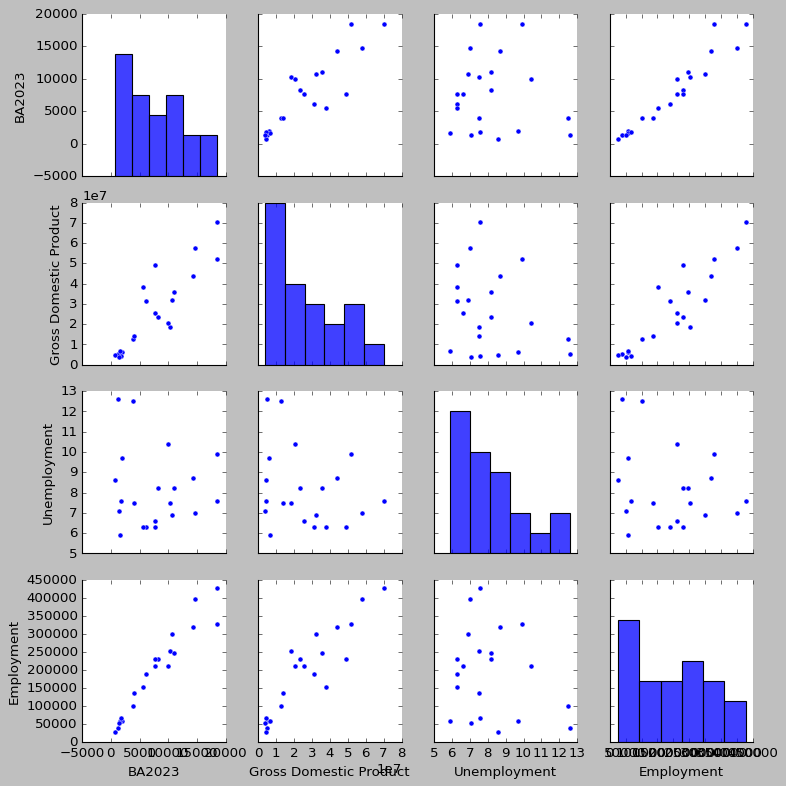

In [ ]:
#Finally using the dataframe mergedOuter I want to create a corr matrix: very handy to get first quick idea about relationships in data, like corr matrix https://www.python-graph-gallery.com/correlogram/
sns.pairplot(mergedOuter[['BA2023','Gross Domestic Product','Unemployment','Employment']]) #,height=2,aspect=1

Explanations>

In the search to understand what factors affect the creation of new businesses in New Jersey and to look for the causes or correlations, in this correlation graph we can see something very interesting, that the level of applications for opening businesses in New Jersey (all counties) has a positive and ascending correlation with the variable Gross Domestic Product of each county in New Jersey. This may indicate that a dynamization of the economy causes the levels of business openings to grow.

In addition, it is observed that there is no tight correlation between New Businesses and unemployment in New Jersey.

However, there is a positive and ascending correlation between New Businesses in New Jersey and the level of employment, which tells us that new ventures create jobs.

Likewise, Gross Domestic Product has a positive and ascending correlation with employment levels, which is reinforced by the theory. Although this may also indicate that the employment variable may generate multicollinearity in the model if we try to do a multiple regression to integrate all the explanatory variables that could explain the variable> New businesses in New Jersey.

In [ ]:
mergedOuter2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023,_merge
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,39665.0,40362.0,41682.0,42850.0,43772.0,49306.0,51055.0,52852.0,54201.0,both
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,63085.0,63323.0,63997.0,65378.0,66972.0,73426.0,75903.0,77278.0,79275.0,both
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,53798.0,53456.0,54639.0,56829.0,58262.0,64983.0,66584.0,67974.0,68992.0,both
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,49078.0,49585.0,51162.0,52445.0,54335.0,59994.0,62506.0,63260.0,64846.0,both
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,32361.0,33248.0,33359.0,34088.0,35378.0,39104.0,41103.0,42920.0,44209.0,both


In [ ]:
# I need to check my data type, we cant use category data in scatterplot, just cross tab or frequency tab.
auto.dtypes

,0
County,object
Employment,int64
Unemployment,float64
Population,object
Gross Domestic Product,int64
Median Income,int64
State,object
BA2005,int64
BA2006,int64
BA2007,int64


<Figure size 640x400 with 0 Axes>

<Axes: xlabel='BA2023', ylabel='Wage 2023'>

Text(0.5, 0, 'Business Applications in 2023')

Text(0, 0.5, 'Average Wage in 2023')

Text(0.5, 1.0, 'Scatter Plot: Business Applications vs Wages in NJ (2023)')

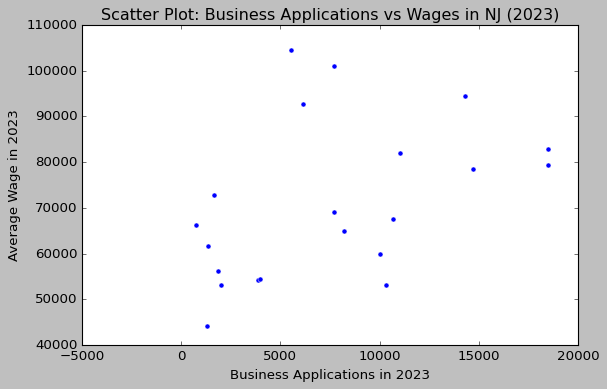

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Business Applications (BA2023) vs. Wages (2023)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="BA2023", y="Wage 2023", data=mergedOuter2)

# Add labels and title
plt.xlabel("Business Applications in 2023")
plt.ylabel("Average Wage in 2023")
plt.title("Scatter Plot: Business Applications vs Wages in NJ (2023)")

# Show the plot
plt.show()

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='BA2023', ylabel='Wage 2023'>

Text(3885, 54201.0, 'Atlantic')

Text(18508, 79275.0, 'Bergen')

Text(7703, 68992.0, 'Burlington')

Text(8225, 64846.0, 'Camden')

Text(1311, 44209.0, 'Cape May')

Text(1982, 53218.0, 'Cumberland')

Text(18476, 82810.0, 'Essex')

Text(3977, 54471.0, 'Gloucester')

Text(14321, 94413.0, 'Hudson')

Text(1674, 72843.0, 'Hunterdon')

Text(6140, 92805.0, 'Mercer')

Text(14685, 78511.0, 'Middlesex')

Text(10695, 67516.0, 'Monmouth')

Text(7694, 101052.0, 'Morris')

Text(10317, 53210.0, 'Ocean')

Text(10025, 59806.0, 'Passaic')

Text(735, 66277.0, 'Salem')

Text(5518, 104451.0, 'Somerset')

Text(1842, 56130.0, 'Sussex')

Text(11045, 82077.0, 'Union')

Text(1359, 61732.0, 'Warren')

Text(0.5, 0, 'Business Applications in 2023')

Text(0, 0.5, 'Average Wage in 2023')

Text(0.5, 1.0, 'Scatter Plot: Business Applications vs Wages in NJ (2023)')

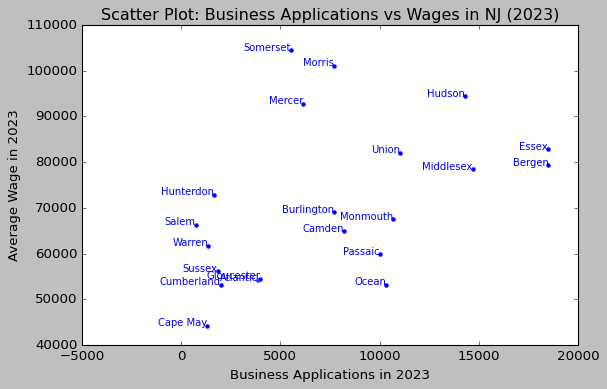

In [ ]:
# Import necessary libraries
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Scatter plot: Business Applications (BA2023) vs. Wages (2023)
sns.scatterplot(x="BA2023", y="Wage 2023", data=mergedOuter2)

# Add county labels to each data point
for i, row in mergedOuter2.iterrows():
    plt.text(row["BA2023"], row["Wage 2023"], row["County"], fontsize=9, ha='right', color='blue')

# Add labels and title
plt.xlabel("Business Applications in 2023")
plt.ylabel("Average Wage in 2023")
plt.title("Scatter Plot: Business Applications vs Wages in NJ (2023)")

# Show the plot
plt.show()


# Regression Model (just extra analysis) and the Regression Estimated Graphic

Finally, I want to explore the relationship between the variables in the hiphoteses, so I will run a regresion.

To perform a simple linear regression using Ordinary Least Squares (OLS) with Business Formation in New Jersey (BA2023) as the dependent variable and Gross Domestic Product (GDP) as the independent variable.

Output Interpretation
Intercept (β0): Expected BA2023 when GDP = 0.
Slope (β1): The change in BA2023 for each unit increase in GDP.
R-squared: How well GDP explains BA2023 (higher = better fit).
p-value: Checks if GDP is statistically significant in predicting BA2023.

 Explanation of the Code
* X = mergedOuter["Gross Domestic Product"] → Defines GDP as the independent variable.
* Y = mergedOuter["BA2023"] → Defines Business Applications (BA2023) as the dependent variable.
* sm.add_constant(X) → Adds an intercept (β0) to the model.
* sm.OLS(Y, X).fit() → Runs Ordinary Least Squares (OLS) regression.
* model.summary() → Displays the full regression output, including coefficients, R-squared, and p-values.

In [ ]:
import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X = mergedOuter["Gross Domestic Product"]  # Independent variable
Y = mergedOuter["BA2023"]  # Dependent variable

# Add constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X).fit()

# Print regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 BA2023   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     67.36
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.14e-07
Time:                        20:11:47   Log-Likelihood:                -194.62
No. Observations:                  21   AIC:                             393.2
Df Residuals:                      19   BIC:                             395.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    999

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'OLS Regression: GDP vs Business Applications in NJ (2023)')

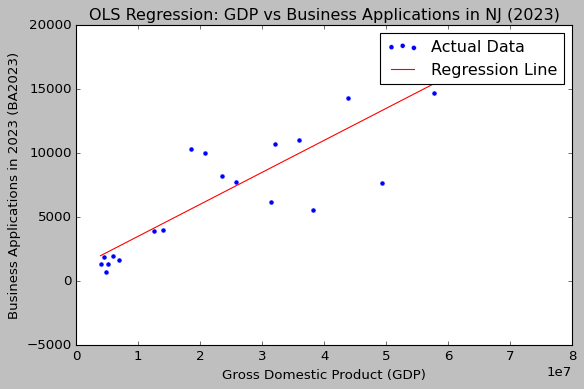

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X = mergedOuter["Gross Domestic Product"]  # Independent variable
Y = mergedOuter["BA2023"]  # Dependent variable

# Add constant to the independent variable (for the intercept)
X_const = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X_const).fit()

# Predicted values from the regression model
predictions = model.predict(X_const)

# Plot scatter plot of actual data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=Y, label="Actual Data")

# Plot regression line
sns.lineplot(x=X, y=predictions, color='red', label="Regression Line")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("OLS Regression: GDP vs Business Applications in NJ (2023)")

# Show the plot
plt.legend()
plt.show()


Conclusion

* The analysis supports the hypothesis that counties in New Jersey with higher GDP levels tend to have a greater number of business applications.
* The OLS regression analysis between Gross Domestic Product GDP and Business Applications BA2023 in New Jersey shows a strong positive relationship R squared equals 0.780, indicating that approximately 78 percent of the variation in business applications can be explained by changes in GDP.
* The coefficient 0.0002 suggests that for every one dollar increase in GDP, business applications increase by 0.0002 on average, which is statistically significant with p value less than 0.001.
* The positive slope of the regression line confirms that counties with higher GDP tend to have more business applications.
* The statistically significant coefficient further confirms that economic growth plays a key role in fostering entrepreneurship.
* Counties with higher GDP likely provide better access to capital, a larger consumer base, and more economic opportunities, which encourage new business formation.
* Finally, the large condition number 5.57e plus 07 suggests potential multicollinearity or numerical issues, so further investigation may be needed to confirm the robustness of these results.
* Recomendation> La investigación futura podría incorporar factores adicionales como el crecimiento de la población, las tasas de desempleo como variable explicativa y los incentivos de política para refinar la comprensión de la dinámica de formación de empresas en Nueva Jersey.

References
* https://github.com/theaok/vis/blob/main/all.ipynb for chart graphs and scatterplot codes
* ChatGpt for regressions and scatterplot labels, fraq.
* Youtube tutorials